In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
workouts = pd.read_csv("Workout Tracker.csv")
workouts.head()

,Date,Muscle,Exercise,Set 1,Set 2,Set 3,Set 4
0,24/09/2024,Chest,Smith Machine Incline Bench,25*10,25*9,25*8,25*7
1,24/09/2024,Shoulders,Dumbbell Lateral Raises,10*10,10*10,10*10,10*10
2,24/09/2024,Triceps,French Dumbbell Press,22*12,22*10,22*8,22*8
3,24/09/2024,Chest,Dumbbell Flys,12*8,12*8,12*8,NaN
4,26/09/2024,Biceps,Arm Curl Machine,41*10,41*10,41*8,41*8


In [4]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      17 non-null     object
 1   Muscle    17 non-null     object
 2   Exercise  17 non-null     object
 3   Set 1     17 non-null     object
 4   Set 2     17 non-null     object
 5   Set 3     17 non-null     object
 6   Set 4     11 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


In [5]:
unique_exercises = workouts['Exercise'].unique()
print(unique_exercises)

['Smith Machine Incline Bench' 'Dumbbell Lateral Raises'
 'French Dumbbell Press' 'Dumbbell Flys' 'Arm Curl Machine'
 'Triceps Pushdown' 'Dumbbell Curls ' 'Overhead Tricep Cable' 'Crunches'
 'Lateral Pulldowns' 'Barbell Row' 'Cable Pullover' 'Cable Row' 'RDL'
 'Seated Calf Raises' 'Hack Squat' 'Leg Extensions']


In [6]:
melted_workouts = workouts.melt(id_vars=["Date", "Muscle", "Exercise"], 
                                value_vars=["Set 1", "Set 2", "Set 3", "Set 4"], 
                                var_name="Set", 
                                value_name="Reps")

melted_workouts.sort_values(by="Date", inplace=True)
melted_workouts.dropna(subset=["Reps"], inplace=True)
melted_workouts.head()

,Date,Muscle,Exercise,Set,Reps
0,24/09/2024,Chest,Smith Machine Incline Bench,Set 1,25*10
51,24/09/2024,Chest,Smith Machine Incline Bench,Set 4,25*7
37,24/09/2024,Chest,Dumbbell Flys,Set 3,12*8
36,24/09/2024,Triceps,French Dumbbell Press,Set 3,22*8
35,24/09/2024,Shoulders,Dumbbell Lateral Raises,Set 3,10*10


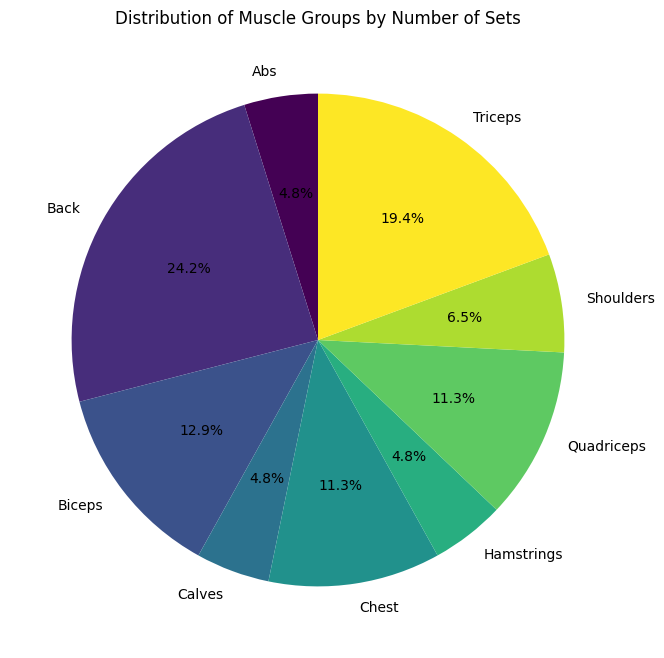

In [7]:
muscle_sets = melted_workouts.groupby("Muscle").size()

plt.figure(figsize=(8, 8))
muscle_sets.plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title("Distribution of Muscle Groups by Number of Sets") 
plt.show()

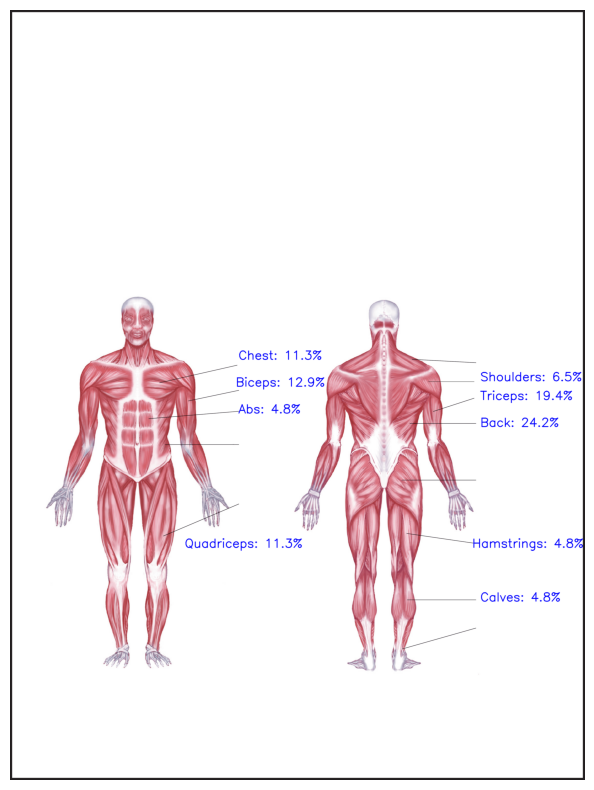

In [9]:
muscle_percentages = (muscle_sets / muscle_sets.sum()) * 100

image = cv2.imread("human_body.png")

positions = {
    "Chest": (850, 1300),
    "Back": (1750, 1550),
    "Biceps": (840, 1400),
    "Quadriceps": (650, 2000),
    "Shoulders": (1750, 1380),
    "Triceps": (1750, 1450),
    "Abs": (850, 1500),
    "Hamstrings": (1720, 2000),
    "Calves": (1750, 2200),
}

for muscle, percentage in muscle_percentages.items():
    position = positions.get(muscle, (50, 50)) 
    text = f"{muscle}: {percentage:.1f}%"
    cv2.putText(image, text, position, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 0, 0), 2, cv2.LINE_AA)  

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()